**Sentiment Analysis using BERT , CNN,  BERT+CNN in Tensorflow**

The goal of this project is to classifiy correctly whether movie reviews from IMDB are positive or negative. First,the traditional statiscical approaches called Bag of Words, TF-IDF (Term Frequency - Inverse Document Frequency), and Word2Vec have been applied and then we compare how differently these methods work . At the second part I am going to apply CNN , BERT, CNN+BERT models to compute vector-space representations of a dataset.

At the **First part** I will: 

*   Loading the IMDB dataset
*   Splitting the dataset between training and test set
*   Data Cleaning and Text Preprocessing
*   Visualization
*   Explaining Bag of Words
*   Explaining TF-IDF
*   Explaining Word2Vec
*   Compareing the approaches by Logistic Regression Model


**Second Part**
*   Build the Convolutional Neural Network Model
*   Train , evaluate the model using Confusion Matrix
*   Save the model 
*   Load a BERT models from TensorFlow Hub 
*   Build and train the BERT models called BERT, small BERT, and Albert 
*   Export the models for inference
*   Evaluate and save the model 
*   Use the pretreined BERT to feed to CNN downsteam Archtectures
*   Evaluate and save the model.
*   Compare the models


 





The experiment is implemented on the Google Colaboratory (Colab) that provides the Jupyter notebook environment and executes code in Python 3.10.4. The Colab supports the Tesla K80 GPU accelerator. The Keras front end runs on the TensorFlow backend. It enables fast experimentation of deep learning models by running code on the graph processing unit (GPU) and central processing unit (CPU). The classification performance of the models is evaluated by using the sklearn metrics

##**Installing dependencies and importing packages**

In [ ]:
!pip install 'tensorflow==2.8.0'

     |████████████████████████████████| 462 kB 9.0 MB/s 


In [ ]:
!pip install 'tf-estimator-nightly==2.8.0.dev2021122109'

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 8.7 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 6.5 MB 64.4 MB/s 
     |████████████████████████████████| 895 kB 47.8 MB/s 
     |████████████████████████████████| 596 kB 51.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 8.4 MB/s 


In [ ]:
!pip install tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 8.6 MB/s 
     |████████████████████████████████| 352 kB 69.9 MB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
     |████████████████████████████████| 99 kB 11.2 MB/s 
     |████████████████████████████████| 47.8 MB 1.4 MB/s 
     |████████████████████████████████| 237 kB 49.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 1.2 MB 60.3 MB/s 
     |████████████████████████████████| 90 kB 7.4 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=1b3505082e54848c036f742b239db86abf86a7ec76bb24e4ffc9622c4cf2ef49
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=e0b5d7e8ec2fffe169f3811cf39521fcd225d368c69683c228db758aaf424331
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b

In [ ]:
import os
import shutil
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from scipy.stats import spearmanr

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow import keras
from tensorflow.keras import layers


from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

# Load the required submodules


import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks




from tqdm.notebook import tqdm

import math
from math import floor, ceil

from transformers import *




In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
np.set_printoptions(suppress=True)
print(tf.__version__)


2.8.0


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [ ]:
from scipy.stats import spearmanr

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import matplotlib.pyplot as plt

# **First Section**

## **Loading and preparing the dataset**

In [ ]:
 df0 = pd.read_csv('/content/IMDB Dataset.csv', delimiter=',')
 df0.dataframeName = 'IMDB Dataset.csv'
 nRow, nCol = df0.shape
 print('There are {} rows and {} columns'.format(nRow, nCol))

There are 50000 rows and 2 columns


In [ ]:
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 50000 rows and 2 columns


In [ ]:
df0.shape



(50000, 2)

In [ ]:
df0.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
unlabel_train= pd.read_csv('/content/Unlabeled_IMDB Dataset.csv')
nRow, nCol = unlabel_train.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 50000 rows and 1 columns


In [ ]:
#Doing some adjustments

df0.rename(columns={'review' : 'text',
                   'sentiment' : 'category'}, 
                    inplace=True)
a=df0['text']
b=df0['category'].map({'positive': 1, 'negative': 0})

df= pd.concat([a,b], axis=1)
df

,text,category
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
df.rename(columns={'sentiment' : 'category',
                   'category':'label'}, 
                    inplace=True)


In [ ]:
df.head()

,text,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# Grouping data by label
# Dataset is balanced.
df.groupby('label').count()

,text
label,
0,25000
1,25000


In [ ]:
y=df['label']

## **Splitting the dataset between training and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],y,
    test_size=0.33,
    stratify=y   
)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
df_train= pd.concat([X_train, y_train], axis=1)

In [ ]:
df_train.head()

,text,label
4408,"This movie is truly amazing,over the years I h...",0
4317,This is a good film for 99% of the duration. I...,1
11929,"Governments are elected for three year terms, ...",1
21281,Red Rock West is a perfect example of how good...,1
12638,"Bugs life is a good film. But to me, it doesn'...",1


In [ ]:
df_train.shape

(33500, 2)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
df_test= pd.concat([X_test, y_test], axis=1)

In [ ]:
df_test.shape

(16500, 2)

## **Data Cleaning and Text Preprocessing**

In this paper, our contributions are clearly presented via
three folds:
*   Traditional Language Proceesing methods called BagofWords, TF-IDF and Word2vec are compared in terms of thier accuracy 
*   The baseline model using BERT embedding is
constructed,
*   Then the convolutional neural network is performed
to solve the text classification problem,
*   a clear comparison of our proposed combination and the
 BERT, CNN are presented.


We need a copy of database for investigating the statistical approaches to extract relevant information from text  

In [ ]:
df_stat = df.copy()

In [ ]:
df_stat

,text,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
df_train_stat=df_train.copy()

In [ ]:
df_train_stat.head()

,text,label
18038,"""Nagisa no Shindobaddo"" or ""Like Grains of San...",1
103,"No, this hilariously horrible 70's made-for-TV...",1
42275,The story takes place in rural Germany on the ...,1
42326,The Jazz Singer is one of a number of films ma...,1
310,"Some people drift through life, moving from on...",1


In [ ]:
df_test_stat = df_test.copy()

In [ ]:
df_test_stat.head()

,text,label
38473,"Well, I think I've finally seen my last Woody ...",0
2197,"""Indian burial ground"": If those three words a...",0
41013,I've just had the evidence that confirmed my s...,0
19184,Don't waste your time or money on this one. Th...,0
43226,"America. A land of freedom, of hope and of dre...",0


First step in text analysis is Data Cleaning and Text Preprocessing. The most common approaches will be discussed at this section.


**Removing Stop words**: 
"Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library.

**Stemming / Lemmatization**: 
It is important to know the difference between these two.

**Stemming**: Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi

**Lemmatization:** Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".

Usually, either one of them is chosen for text-analysis not both. As a side note, Lancaster is the most aggressive stemmer among three major stemming algorithms (Porter, Snowball, Lancaster) and Porter is the least aggressive. The "aggressive algorithms" means how much a working set of words are reduced. The more aggressive the algorithms, the faster it is; however, in some certain circumstances, it will hugely trim down your working set. Therefore, in this project I decide to use snowball since it is slightly faster than Porter and does not trim down too much information as Lancaster does.

**Tokenization**: 
Tokenization is the process splitting a sentence or paragraph into the most basic units

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def prep(text):
    
    # Remove HTML tags.
    text = BeautifulSoup(text,'html.parser').get_text()
    
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Lower case
    text = text.lower()
    
    # Tokenize to each word.
    tokens = nltk.word_tokenize(text)
    
    # Stemming
    text = [nltk.stem.SnowballStemmer('english').stem(w) for w in tokens]

    # 5. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 6. Remove stop words. 
    words = [w for w in tokens if not w in stops]
    
    # Join the words back into one string separated by space, and return the result.
    return " ".join(text)
    

In [ ]:
df_stat['clean'] = df_stat['text'].apply(prep)

In [ ]:
df_stat.head()

,text,label,clean
0,One of the other reviewers has mentioned that ...,1,one of the other review has mention that after...
1,A wonderful little production. <br /><br />The...,1,a wonder littl product the film techniqu is ve...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonder way to spend time ...
3,Basically there's a family where a little boy ...,0,basic there s a famili where a littl boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...


In [ ]:

df_train_stat['clean'] = df_train_stat['text'].apply(prep)

In [ ]:
# More investigation 
# test whether the function successfully preprocessed.
#df_train_stat['text'].iloc[:2].apply(prep).iloc[0]

In [ ]:
df_train_stat.head()

,text,label,clean
18038,"""Nagisa no Shindobaddo"" or ""Like Grains of San...",1,nagisa no shindobaddo or like grain of sand is...
103,"No, this hilariously horrible 70's made-for-TV...",1,no this hilari horribl s made for tv horror cl...
42275,The story takes place in rural Germany on the ...,1,the stori take place in rural germani on the e...
42326,The Jazz Singer is one of a number of films ma...,1,the jazz singer is one of a number of film mad...
310,"Some people drift through life, moving from on...",1,some peopl drift through life move from one th...


In [ ]:
df_test_stat['clean'] = df_test_stat['text'].apply(prep)

In [ ]:
df_test_stat.head()

,text,label,clean
38473,"Well, I think I've finally seen my last Woody ...",0,well i think i ve final seen my last woodi all...
2197,"""Indian burial ground"": If those three words a...",0,indian burial ground if those three word appea...
41013,I've just had the evidence that confirmed my s...,0,i ve just had the evid that confirm my suspici...
19184,Don't waste your time or money on this one. Th...,0,don t wast your time or money on this one the ...
43226,"America. A land of freedom, of hope and of dre...",0,america a land of freedom of hope and of dream...


In [ ]:
print('Training dim:',df_train_stat.shape, 'Test dim:', df_test_stat.shape)

Training dim: (33500, 3) Test dim: (16500, 3)


 **Visualization** 



**WordCloud**
As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively. Also , the drawback for WordCloud is that the graphics only reflect the frequency of words, which can cause some uninformative words frequently appeared in the text can be highlighted on the cloud instead of informative words which is less frequently appeared in the text. These kind of uninformative words could be stopwords or just some words frequently appeared in documents that particularly longer than other documents. Although the WordCloud is not the best visualization method to show all the aspect of the data, it is worth plotting them so that we can quickly and intuitively see what the text is about.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [ ]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Let's see the most frequent words in negative category 

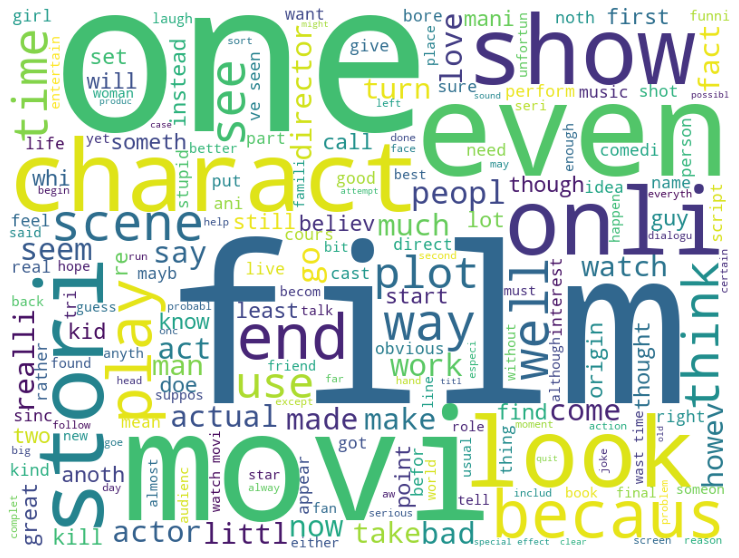

In [ ]:
cloud(' '.join(df_stat.loc[df_stat["label"]==0].clean))

You can see some words such as "bad", "wast time","problem","stupid","unfortune,"kill idea" and "bore" in this category.

Also, take a look at the most frequent words in positive category

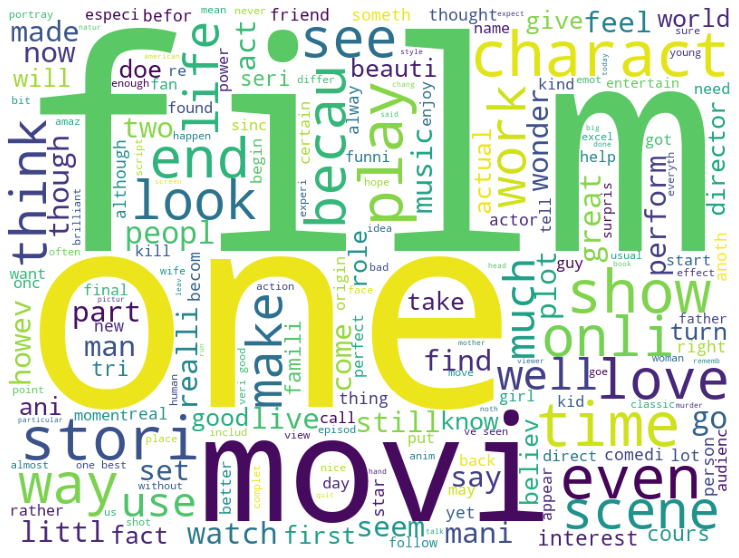

In [ ]:
cloud(' '.join(df_stat.loc[df_stat["label"]==1].clean))

As expected, most of emphasized words are just normal words like "film", "one", "movie", "show", and "stori" which appear to be not informative to distinguish one document from the others or distinguish between negative and positive movie reviews. ALso, some words such as "great", "love", "good", "interest", "nice", "best", "perfect","briliant" exist in the positive category.

Base on my underestanding the algorithms works better in positive category than negative. I think,the reason is that in nagative reviews there are some negative perfix like "un", "non","not" and those algorithms can not distinguish them well.

**Distribution**

Now the distribution shape of ferequent and unique words in the datafarme will be shown.

 We need to split each words in cleaned review and then count the number of each rows of data frame.

In [ ]:
df_train_stat['freq_word'] = df_train_stat['clean'].apply(lambda x: len(str(x).split()))
df_train_stat['unique_freq_word'] = df_train_stat['clean'].apply(lambda x: len(set(str(x).split())))
                                                 
df_test_stat['freq_word'] = df_test_stat['clean'].apply(lambda x: len(str(x).split()))
df_test_stat['unique_freq_word'] = df_test_stat['clean'].apply(lambda x: len(set(str(x).split()))) 

median of word frequency:  176.0
median of uniuqe word frequency:  112.0


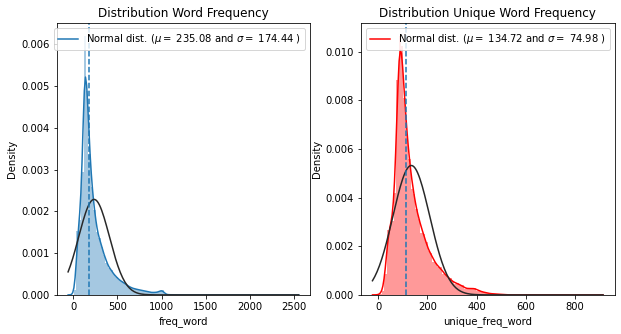

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(df_train_stat['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(df_train_stat['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(df_train_stat['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", df_train_stat['freq_word'].median())


sns.distplot(df_train_stat['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(df_train_stat['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(df_train_stat['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", df_train_stat['unique_freq_word'].median())

The black contour of the distribution graphs represent the normal distribution if the data would have been distributed as normal. Compared to the black contour, the actual distribution is pretty skwed; therefore, median would be better to use as a measure of representative of data since mean is very sensitive to outliers and noise especially the distribution is highly skewed. As shown in the legend, the mean of the word frequency is 235.08 and the mean of the unique word is 134.72 .It means 235.08 words and 134.77 unique words are used for each review. Also the dashed lines represent the median of the distribution. Another thing to notice is that the median values are very closely located to the normal distribution's mean points.

## **Initail look at the Data**

In [ ]:
df_stat.head()

,text,label,clean
0,One of the other reviewers has mentioned that ...,1,one of the other review has mention that after...
1,A wonderful little production. <br /><br />The...,1,a wonder littl product the film techniqu is ve...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonder way to spend time ...
3,Basically there's a family where a little boy ...,0,basic there s a famili where a littl boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...


In [ ]:
df_train_stat['phrase_len'] = [len(t) for t in df_train_stat.text]
df_train_stat.head(4)

,text,label,clean,freq_word,unique_freq_word,phrase_len
18038,"""Nagisa no Shindobaddo"" or ""Like Grains of San...",1,nagisa no shindobaddo or like grain of sand is...,233,125,1260
103,"No, this hilariously horrible 70's made-for-TV...",1,no this hilari horribl s made for tv horror cl...,315,247,1958
42275,The story takes place in rural Germany on the ...,1,the stori take place in rural germani on the e...,339,202,1956
42326,The Jazz Singer is one of a number of films ma...,1,the jazz singer is one of a number of film mad...,392,207,2333


**Overall Distribution of the length of the reviews under each sentiment class**

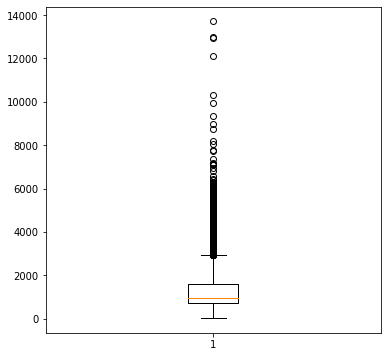

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
plt.boxplot(df_train_stat.phrase_len)
plt.show()

From the above box plot, some of the reviews are way more than 2500 chracters long.

In [ ]:
df_train_stat[df_train_stat.phrase_len > 2500].head()

,text,label,clean,freq_word,unique_freq_word,phrase_len
310,"Some people drift through life, moving from on...",1,some peopl drift through life move from one th...,1030,390,5862
32311,Beauty in Trouble (Kráska v nesnázích) is not ...,1,beauti in troubl kr ska v nesn z ch is not a g...,589,288,3321
19767,"The main problem with the documentary ""Czech D...",0,the main problem with the documentari czech dr...,616,305,3546
8311,Hollow Man starts as brilliant but flawed scie...,1,hollow man start as brilliant but flaw scienti...,698,334,3887
19341,After his classic film noir homage Chinatown R...,1,after his classic film noir homag chinatown ro...,508,261,3022


In [ ]:
import statistics
statistics.mean(df_train_stat.phrase_len)

1314.3174925373135

In [ ]:
max(df_train_stat.phrase_len)

13704

In [ ]:
min(df_train_stat.phrase_len)

32

In [ ]:
#df_train_initial[df_train_initial.phrase_len > 100].loc[22910].text

**Term Frequencies of each Sentiment class**

We also want to understand how terms are distributed across documents. This helps us to characterize the properties of the algorithms for compressing phrases.

A commonly used model of the distribution of terms in a collection is Zipf's law . It states that, if  t1  is the most common term in the collection,  t2  is the next most common, and so on, then the collection frequency  cfi  of the  i th most common term is proportional to  1/i :
```bash
cfi∝1/i. 
```
So if the most frequent term occurs  cf1  times, then the second most frequent term has half as many occurrences, the third most frequent term a third as many occurrences, and so on. **The intuition is that frequency decreases very rapidly with rank.** The above equation is one of the simplest ways of formalizing such a rapid decrease and it has been found to be a reasonably good model.

We need the **Term Frequency data to see what kind of words are used in the movie reviews and how many times have been used.** Let's proceed with CountVectorizer to calculate term frequencies:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))


We set min_df = 0.0, max_df = 1.0 and ngram_range = (1,2). min_df and max_df  is the min and max of times that word should be appeared in each document in order to include the vocabulary in the matrix. ngram_range means we cut one sentence by number of ngram. Let's say we have one sentence, I am a human. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a human"]. The result of accuracy can be highly dependent on parameters.

In [ ]:
cvector.fit(df_train_stat.text)

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [ ]:
len(cvector.get_feature_names())

1869261

It looks like count vectorizer has extracted 1869261 words out of the corpus. Getting term frequency for each class can be obtained with the below code block.

**Term Frequency for 'negative' sentiments**

In [ ]:
neg_matrix = cvector.transform(df_train_stat[df_train_stat.label == 0].text)
pos_matrix = cvector.transform(df_train_stat[df_train_stat.label == 1].text)

In [ ]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [ ]:
neg_tf.head(20)

,Terms,negative
0,the,220590
1,and,99920
2,of,92814
3,to,92319
4,br,70193
5,is,67011
6,it,64646
7,in,59232
8,this,54760
9,that,50244


In [ ]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head(20)

,negative
Terms,
the,220590
and,99920
of,92814
to,92319
br,70193
is,67011
it,64646
in,59232
this,54760


**Term Frequency for 'Positive' sentiments**

In [ ]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head(20)

,positive
Terms,
the,228319
and,118321
of,101871
to,88356
is,75065
in,66172
br,66154
it,63830
that,46893


In [ ]:
term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)

**Total Term Frequency of all the 2 sentiment classes**

In [ ]:
term_freq_df['total'] = term_freq_df['negative']  +  term_freq_df['positive'] 
                                 
                                 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,positive,total
Terms,,,
the,220590,228319,448909
and,99920,118321,218241
of,92814,101871,194685
to,92319,88356,180675
is,67011,75065,142076
br,70193,66154,136347
it,64646,63830,128476
in,59232,66172,125404
this,54760,46650,101410


**Frequency plot of top frequent 500 phrases in movie reviews**

Given some corpus of natural language utterances, **the frequency of any word is inversely proportional to its rank in the frequency table**. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc."
```bash
In other words, the rth most frequent word has a frequency f(r) that scales according to
f(r)∝1/rα
 
for
α≈1
``` 
Let's see how the movie review tokens and their frequencies look like on a plot.

Text(0.5, 1.0, 'Top 500 phrases in movie reviews')

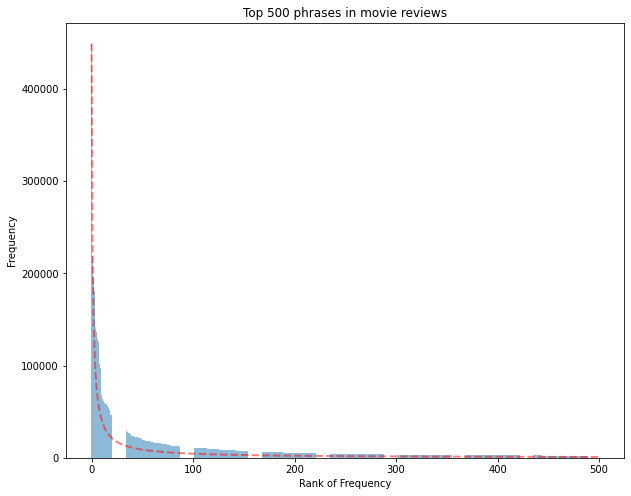

In [ ]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Rank of Frequency')
plt.title('Top 500 phrases in movie reviews')

On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus.

Another way to plot this is on a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting on the log-log scale the result will yield roughly linear line on the graph.

**Plot of Absolute frequency of phrases against their rank**

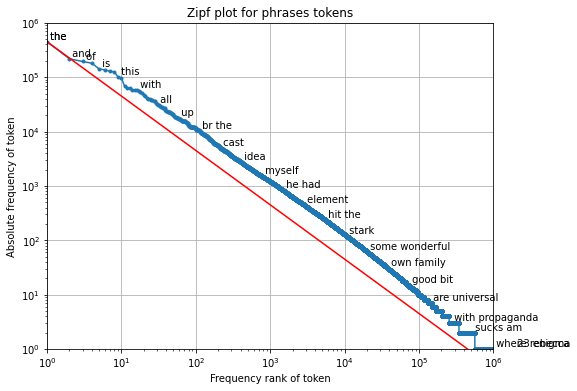

In [ ]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

We can clearly see that words like "the", "in","it", etc are much higher in frequency but has been ranked less as they don't have any significance regarding the sentiment of the movie review. On the other hand, some words like "wonderful","good" have been given higher rank as they are very less frequent in the document and seems to be significant related to the sentiment of a movie.

**Movie Reviews Tokens Visualisation**

Next, let's explore about how different the tokens in two different classes(positive, negative).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_train_stat.text)

CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
neg_matrix = cvec.transform(df_train_stat[df_train_stat.label == 0].text)
pos_matrix = cvec.transform(df_train_stat[df_train_stat.label== 1].text)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['positive'] 
                                 
        
term_freq_df.sort_values(by='total', ascending=False).head(15)

,negative,positive,total
Terms,,,
br,70193,66154,136347
movie,33457,25327,58784
film,25427,28214,53641
like,15152,11852,27004
just,14311,9445,23756
good,9873,10034,19907
time,8425,8532,16957
really,8323,7204,15527
story,6892,8598,15490


**Plot of top frequently used 50 phrases in negative movie reviews**

Text(0.5, 1.0, 'Top 50 tokens in negative movie reviews')

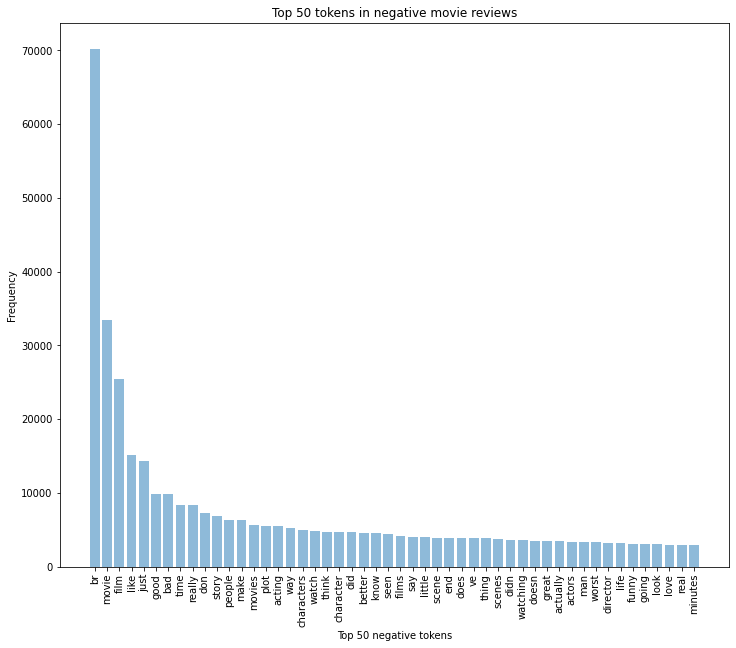

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

Words such as "bad", "like", "time" are more frequent words in negative movie reviews.

**Plot of top frequently used 50 phrases in positive movie reviews**

Text(0.5, 1.0, 'Top 50 tokens in positive movie reviews')

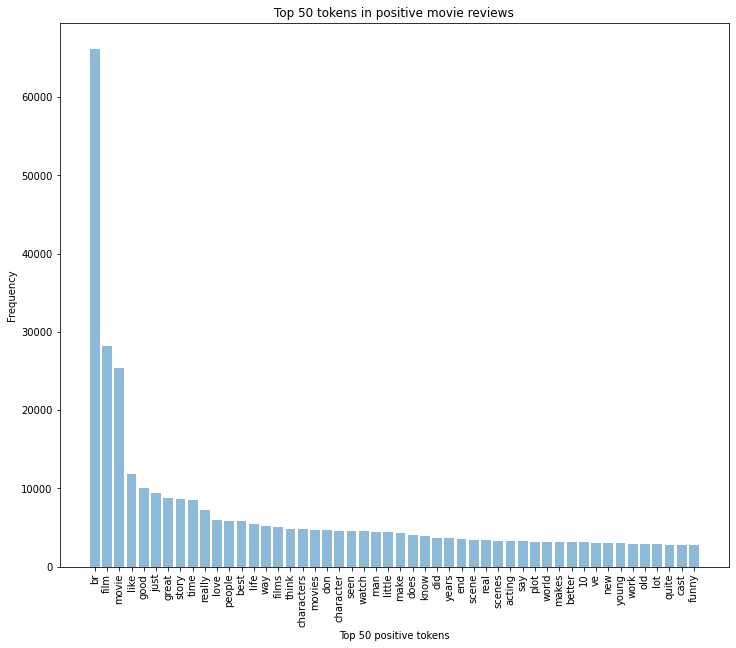

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive movie reviews')

Words such as "good", "great", "love", "best" are more frequent in positive movie review.Also, there are some neutral words like "film", "movie", are quite high up in the rank. 

## **Bag of Words**




One common approach to represent the words is called Bag of Words. It is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. As you know already, the number of vocabulary is very large so it is important to limit the size of the feature vectors. In this project, we use the 18000 most frequent words. Also, the other things to notice is that we set min_df = 2 and ngram_range = (1,3). min_df = 2 means in order to include the vocabulary in the matrix, one word must appear in at least two documents. ngram_range means we cut one sentence by number of ngram. Let's say we have one sentence, I am a human. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a human"]. The result of accuracy can be highly dependent on parameters.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# More investigation 


# cv1 = CountVectorizer()
# x_traincv = cv1.fit_transform(["Hi How are you How are you doing","Hi what's up","Wow that's awesome"])

# x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(cv1.get_feature_names()))
# x_traincv_df

In [ ]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# Other parameters are self-explanatory and already mentioned in other notebooks.
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3)
                            )

As mentioned, the matrix is going to be huge so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline( [('vect', vectorizer)] )

In [ ]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.

train_bw = pipe.fit_transform(df_train_stat['clean'])

# We only call transform not fit_transform due to the risk of overfitting.

test_bw = pipe.transform(df_test_stat['clean'])

In [ ]:
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (33500, 18000) test dim: (16500, 18000)


In [ ]:
# More Investigations

# Get the name for the features
lexi = vectorizer.get_feature_names()
lexi[:5]

# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)
train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = lexi)
train_sum.head()


,aaron,abandon,abc,abduct,abil,abil to,abl,abl to,abl to see,aboard,...,yourself,yourself favor,yourself favor and,youth,youtub,zero,zombi,zombi movi,zone,zoom
0,126,376,138,95,763,398,1780,1696,89,93,...,1278,117,85,459,89,444,1455,123,202,97


**Modelling**

In [ ]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression


In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
lr_CoVec = LogisticRegression()


lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[0.0005],
    'class_weight':['balanced'],
    
    }

lr_CV = GridSearchCV(lr_CoVec, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
lr_CV.fit(train_bw, df_train_stat['label'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.0005, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2'}


In [ ]:
y_CoVec = lr_CV.predict(test_bw)

In [ ]:
y_CoVec

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print(lr_CV.best_score_)

0.9283554644687013


## **TF-IDF (Term Frequency - Inverse Document Frequency)**

The second approch is TF-IDF in which instead of CountVectorizer, we will be analyzing the movie reviews by using TF-IDF (Term Frequency - Inverse Document Frequency). 

**TF-IDF**  : It can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix).

**How exactly does TF-IDF work?**

Consider the below sample table which gives the count of terms(tokens/words) in two documents

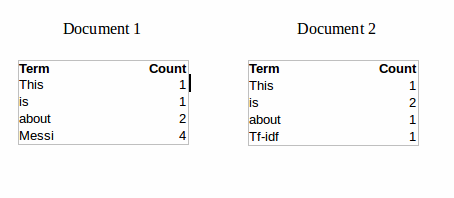

Now, let us define a few terms related to TF-IDF.
```bash
TF (Term Frequency) : Denotes the contribution of the word to the document i.e. words relevant to the document should be frequent.

 TF = (Number of times term t appears in a document)/(Number of terms in the document)

 So, TF(This,Document1) = 1/8

TF(This, Document2)=1/5
```


**IDF (Inverse Document Frequency)** :

If a word has appeared in all the document, then probably that word is not relevant to a particular document. But, if it has appeared in a subset of documents then probably the word is of some relevance to the documents it is present in.

```bash
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.


So, IDF(This) = log(2/2) = 0. IDF(Messi) = log(2/1) = 0.301.

Now, let us compare the TF-IDF for a common word ‘This’ and a word ‘Messi’ which seems to be of relevance to Document 1.
 
TF-IDF(This,Document1) = (1/8) * (0) = 0

TF-IDF(This, Document2) = (1/5) * (0) = 0

TF-IDF(Messi, Document1) = (4/8) * 0.301 = 0.15
```
So, for Document1 , TF-IDF method heavily penalises the word ‘This’ but assigns greater weight to ‘Messi’.  This may be understood as ‘Messi’ is an important word for Document1 from the context of the entire corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [ ]:

tv_model = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)


**ngram_range** : A tuple of lower and upper boundary of the range of n-values for different n-grams to be extracted.

**sublinear_tf** : Sublinear tf scaling addresses the problem that 20 occurrences of a word is probably not 20 times more important than 1 occurrence.

In [ ]:
train_tv = tv_model.fit_transform(df_train_stat['clean'])
test_tv = tv_model.transform(df_test_stat['clean'])

In [ ]:
# More Investigations

# Create the list of vocabulary used for the vectorizer.
#vocab = tv.get_feature_names()
#print(vocab[:5])
#print("Vocabulary length:", len(vocab))
# dist = np.sum(train_tv, axis=0)
# checking = pd.DataFrame(dist,columns = vocab)
# checking

In [ ]:
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)

Training dim: (33500, 40000) Test dim: (16500, 40000)


**Modelling**

In [ ]:
lr_TF = LogisticRegression()

lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[0.05],
    'class_weight':[{1:1}]
    
    }

lr_TF_IDF = GridSearchCV(lr_TF, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_TF_IDF.fit(train_tv, df_train_stat['label'])
print(lr_TF_IDF.best_params_)
logi_best = lr_TF_IDF.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.05, 'class_weight': {1: 1}, 'dual': False, 'penalty': 'l2'}


In [ ]:
y_TF_IDF = lr_TF_IDF.predict(test_tv)

In [ ]:
y_TF_IDF

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print(lr_TF_IDF.best_score_)

0.9421916328803743


## **Word2Vec**

For a bit deeper sentiment analysis, we will be using Word2Vec. It is a neural network based algorithm that creates distributed word vectors. One of the advantages of Word2Vec over Bag Of Words, it understands meaning and semantic relationships among words. Also, it does not require labels in order to create meaningful representations. In addition that in a aspect of speed, it learns quickly compared to other methods.

**Splitting a Sentence to Words**

The most important thing to notice is **splitting sentences by sentences prior to splitting them to single word** because you will lose the information which words have formed a sentence if you split into words first. Some may question that simple split function might be enough to split up a paragraph to sentences; however, English sentences can end with many punctuations and it is not strange that anything can be placed at the end of the sentences. For this reason, when we split text into sentences, we need to use NLTK's punkt tokenizer (sent_tokenize function uses an instance of a punkt tokenizer). The punkt tokenizer is an unsupervised trainable model ,which enables that the tokenizer uses to decide where to cut or learn abbreviations in text.

In [ ]:
def preprocess_wordlist(data, stopwords = False):
    
    # Remove HTML tag
    review = BeautifulSoup(data,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub('[^a-zA-Z]', ' ', review)
    
    # Convert to lower case
    review = review.lower()
    
    # Tokenize
    word = nltk.word_tokenize(review)
    
    # Optional: Remove stop words (false by default)
    if stopwords:
        stops = set(nltk.corpus.stopwords.words("english"))
        
        words = [w for w in word if not w in stops]
    
    return word

For creating a model, unlike Bag Of Words method, it is not necessary to remove the stopwords such as "the", "a", "and", etc as the algorithm relies on the broader context of the sentence in order to produce high-quality word vectors.

**Splitting a Paragraph to Sentences**

In [ ]:
def preprocess_sent(data, stopwords = False):
    
    # Split the paragraph into sentences
    
    #raw = tokenizer.tokenize(data.strip())
    raw = nltk.sent_tokenize(data.strip())
    
    # If the length of the sentence is greater than 0, plug the sentence in the function preprocess_wordlist (clean the sentence)
    sentences = [preprocess_wordlist(sent, stopwords) for sent in raw if len(sent) > 0]
    
    return sentences

**Combining Labeled and Unlabeled Reviews**

The big idea in Word2vec is its ability to be regrad as  self-supervision so we need to use unlabeled data along with labeled data to train the model.

In [ ]:
sentence = []

# Append labeled reviews first
for review in df_train_stat['text']:
    sentence += preprocess_sent(review)
    
# Append unlabeled reviews
for review in unlabel_train['review']:
    sentence += preprocess_sent(review)

In [ ]:
print(len(sentence))
print()
print(sentence[:2])

897539

[['nagisa', 'no', 'shindobaddo', 'or', 'like', 'grains', 'of', 'sand', 'is', 'an', 'amazingly', 'beautiful', 'story', 'about', 'teenage', 'boys', 'and', 'girls', 'dealing', 'with', 'the', 'state', 'of', 'becoming', 'one', 'with', 'who', 'they', 'are'], ['this', 'movie', 'isn', 't', 'about', 'homosexuality', 'but', 'it', 'is', 'about', 'sexuality', 'aihara', 'an', 'aloof', 'girl', 'will', 'definitely', 'make', 'the', 'viewers', 'ponder', 'who', 'is', 'behind', 'the', 'aloof', 'girl']]


In general, there are two types of architecture options: skip-gram (default) and CBOW (continuous bag of words). Most of time, **skip-gram** is little bit slower but has more accuracy than CBOW. CBOW is the method to predict one word by whole text; therefore, small set of data is more favorable. On the other hand, skip-gram is totally opposite to CBOW. With the target word, skip-gram is the method to predict the words around the target words. The more data we have, the better it performs.Also, As the architecture, there are two training algorithms for Word2Vec: Hierarchical **softmax**(default) and negative sampling. We will be using the default.

In [ ]:
from gensim.models import word2vec

In [ ]:
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.0001

min_count=4,
                         window=4,
                         size=300, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         sg = 1,
                         workers=cores-1)

**num_processor**  : Number of parallel processes to run. One thing to remember here is that unlike sklearn, it does not accept -1 option to use all the processors.

**Downsampling of frequent words** : According to the Google documentation, values between 0.00001 and 0.001 would suffice.

**Context**: How many words around the target word will be used?

**Minimum word count**: This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. The reason why I chose 40 is that there are 30 reviews in each movie and repeat the title 30 times; therefore in order to avoid attaching too much importance to individual movie titles, I set to 40.

**Word vector dimensionality** : Self-explanatory.

In [ ]:
# Plug in the sentence variable first.

Word2vec_model = word2vec.Word2Vec(sentence, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [ ]:
# Unload unneccessary memory once the learning process is done.

Word2vec_model.init_sims(replace = True)

In [ ]:
Word2vec_model_name = "400features_40minwords_10context"
Word2vec_model.save(Word2vec_model_name)

In [ ]:
# More Investigation
Word2vec_model.most_similar("great")

[('wonderful', 0.6839907765388489),
 ('fantastic', 0.669306755065918),
 ('terrific', 0.6478709578514099),
 ('excellent', 0.6251899600028992),
 ('fine', 0.5910623669624329),
 ('good', 0.5824564099311829),
 ('superb', 0.5751661658287048),
 ('fabulous', 0.5745924115180969),
 ('brilliant', 0.5554219484329224),
 ('outstanding', 0.5407204031944275)]

**Vector Averaging**

In [ ]:


def makeFeatureVec(review, model, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(model.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

The purpose of this function is to combine all the word2vec vector values of each word in each review
if each review is given as input and divide by the total number of words.


The purpose of this function is to combine all the word2vec vector values of each word in each review
if each review is given as input and divide by the total number of words.

Each word can be represented as number of feature dimension space vector. 
```bash 
ex) model['flower'] = array([0.1, 0.2, ...]).
```
You can think of it as extended xy coordinate. Therefore, it enables vectorizing each review by 
combining all the words' vector values.
```bash
Illustration example:

'I' = [0.1, 0.2, ...]
'have' = [0.2, 0.3, ...]
'a car' = [0.1, 0.2, ...]
'I have a car' = [0.1 + 0.2 + 0.1, 0.2 + 0.3 + 0.2,  ...]
```
```
ex) review1 = ['he', 'has', 'a', 'cat']

First word : If the word 'he' is in the word2vec, index the vector values from word2vec model by model['he']
(the dimension of the matrix would be, in this case, (400,) ) and add them to predefined zero matrix.

Second word: Check if there is the word 'has' in the word2vec model and if there is, index the vector values and 
add them on top of the added vector values from the first word.

The rest: Iterate the above steps for the rest of words and lastly, divide by the total number of words. 
```bash
Illustration example: 

zero : [0,    0,   0,   ....]
word1: [0.2,  0.3, 0.4, ....]
word2: [0.1,  0.2, 0.3, ....]

word(1~2): [0.3, 0.5, 0.7, ....]
```

In [ ]:


def getAvgFeatureVec(clean_reviews, model, num_features):
    
    # Keep track of the sequence of reviews, create the number "th" variable.
    review_th = 0
    
    # Row: number of total reviews, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    reviewFeatureVecs = np.zeros((len(clean_reviews), num_features), dtype = "float32")
    
    # Iterate over reviews and add the result of makeFeatureVec.
    for review in clean_reviews:
        reviewFeatureVecs[int(review_th)] = makeFeatureVec(review, model, num_features)
        
        # Once the vector values are added, increase the one for the review_th variable.
        review_th += 1
    
    return reviewFeatureVecs


In getAvgFeatureVec function, While iterating over reviews, add the vector sums of each review from the function "makeFeatureVec" to 
the predefined vector whose size is the number of total reviews and the number of features in word2vec.
The working principle is basically same with "makeFeatureVec" but this is a review basis and 
makeFeatureVec is word basis (or each word's vector basis)


return matrix:

```bash
            'V1'    'V2'    'V3'     'V4'
review 1    0.1      0.2     0.1     0.5

review 2    0.5      0.4     0.05    0.05
```

In [ ]:
clean_train_reviews = []

# Clean the reviews by preprocessing function with stopwords option "on".
for review in df_train_stat["text"]:
    clean_train_reviews.append(preprocess_wordlist(review, stopwords = True))

# Apply "getAvgFeatureVec" function.
trainDataAvg = getAvgFeatureVec(clean_train_reviews, Word2vec_model, num_features)
    
    
# Same steps repeats as we did for train_set.    
clean_test_reviews = []

for review in df_test_stat["text"]:
    clean_test_reviews.append(preprocess_wordlist(review, stopwords = True))

testDataAvg = getAvgFeatureVec(clean_test_reviews, Word2vec_model, num_features)

Notice that we use stop word removal, which would just add noise.


**Modeling**

In [ ]:
lr = LogisticRegression()


lr_param2 = {
    'penalty':['l1'],
    'dual':[False],
    'C':[400],
    'class_weight':['balanced'],
    'solver':['saga']
     
    
}

lr_CV = GridSearchCV(lr, param_grid = [lr_param2], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(trainDataAvg,df_train_stat['label'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 400, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_Wordvec = lr_CV.predict(testDataAvg)

In [ ]:
y_Wordvec 

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print(lr_CV.best_score_)

0.9509191089329472


0.9502938026286477

**Word2Vec Visualization**

As the Word2Vec has more than two features, it is hard to directly plot the whole data. We will be using the technique called t-SNE so that we can reduce the dimensions from 400 to 2, which enables to visualize more human-friendly and see the relationship among points (words).

In [ ]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# List of vocabulary.

vocab = list(Word2vec_model.wv.vocab)

# index vector values by corresponding vocab list

X = Word2vec_model[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])

Total Number of Vocab: 17412

[-0.00559695 -0.05672394 -0.00149719 -0.04882601 -0.0061594   0.00038313
 -0.16384232  0.03401916 -0.0582063   0.0153594 ]


In [ ]:
df_tsne = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df_tsne.head()

,X,Y
no,6.801770,2.315692
or,5.923384,3.021093
like,5.187314,4.701086
of,1.480922,-2.590028
sand,-0.633360,-4.295967


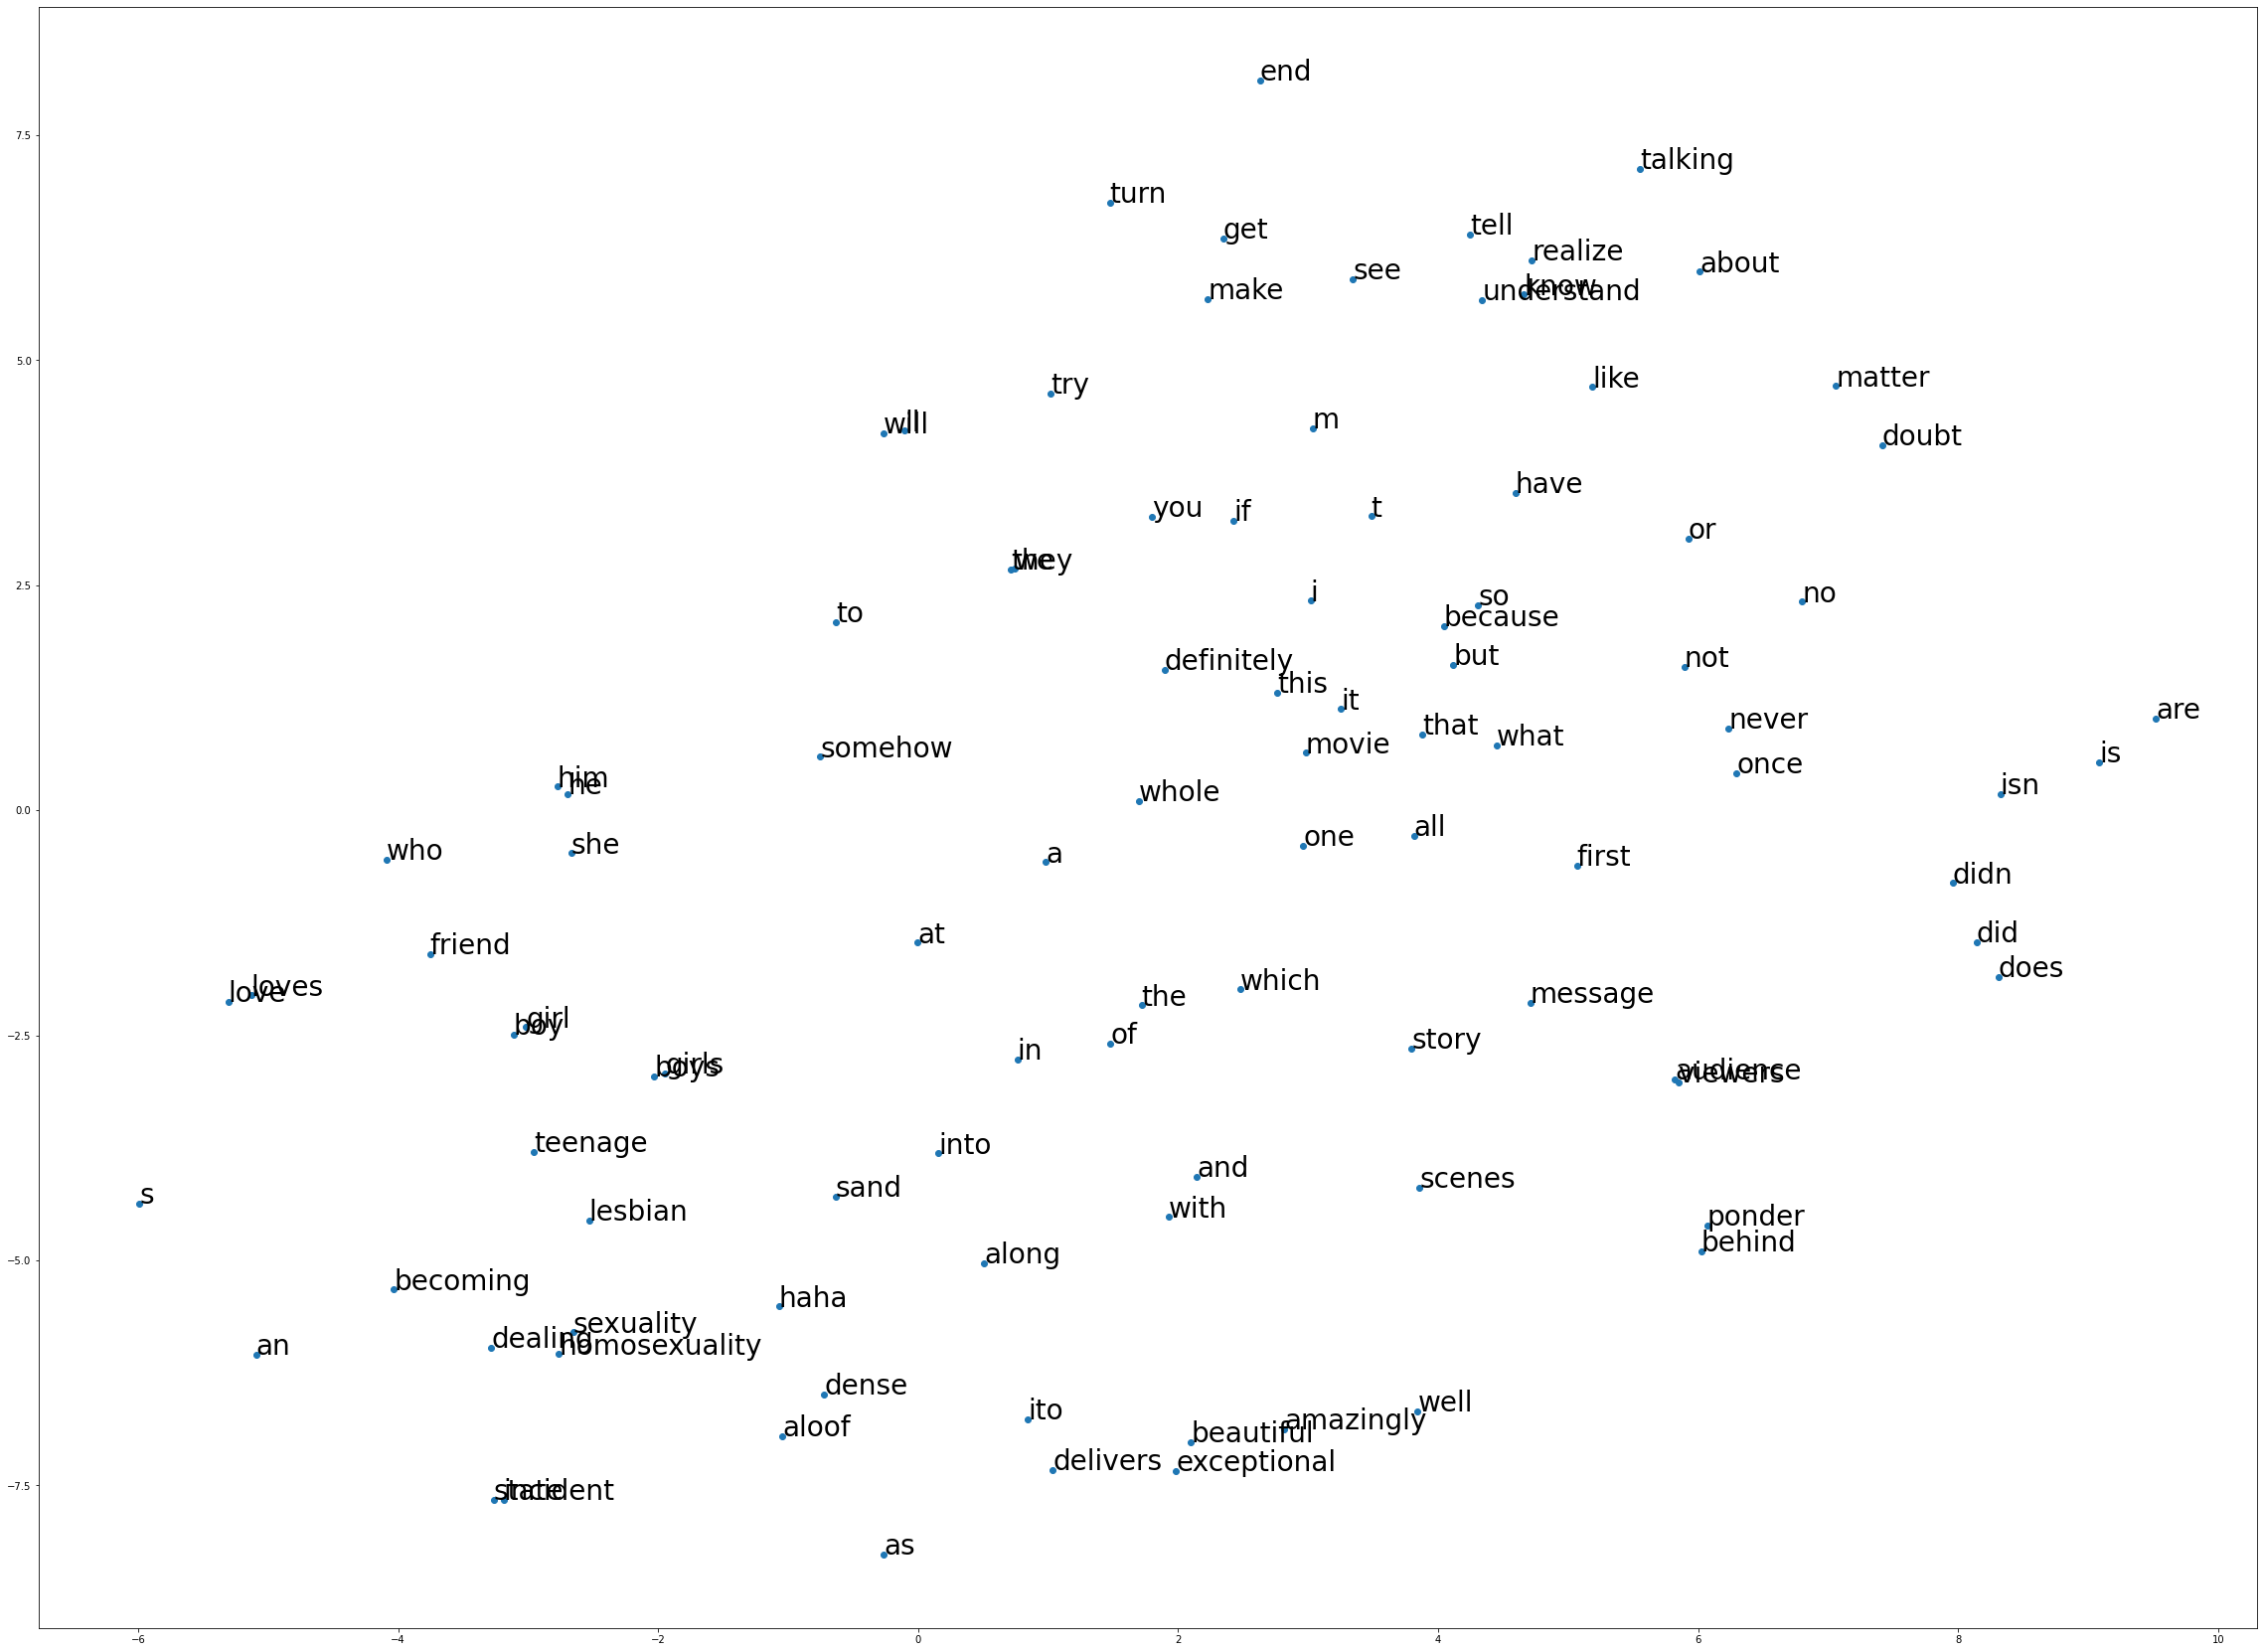

In [ ]:
fig = plt.figure()
fig.set_size_inches(40,)

ax = fig.add_subplot(1,1,1)
ax.scatter(df_tsne['X'], df_tsne['Y'])

# Put the label on each point.
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos, fontsize = 28)
plt.show()

The above plot indicates defining meaning of the word as a point in space based on its distribution. First, Similar words are nearby in semantic space such as"beautiful","amazing" ,or "understand","know", "realize",are located very closely . On the other hand, consider "word association" in which words can be related in semantic frame or field such as "sextuality","lisbian" ,"homoesextuality". Also, there are some opposite words which are nearby such as "girl", and "boy","once","never".Lastly, one more pattern to notice is stopword groups: "the", "a", "an" and "is", "was", "are", "s", "ve", "has". Even though they do not give any information about the review, the fact that the stopwords are clustered together closely shows how well the t-sne performed. It can be said that compared to the previous methods' (CountVectorizer, TF-IDF) WordCloud, it appears more informative and based on the above plot, we can capture the general shape of the first review.

Generally ,Language models such as word2vec has limitation  when interpreting context and polysemous words. BERT effectively addresses ambiguity, which is the greatest challenge to natural language understanding according to research scientists in the field. It is capable of parsing language with a relatively human-like "common sense".

## **Conclusion** 

All of the models have been trained using Logistic Regression and the result obtained from the models are as the following:
```bash
Bag-of-Words: 0.9283554644687013
TF-IDF : 0.9421916328803743 
Word2vec: 0.9509191089329472

```
The best result is 95.09 % performed by TF-IDF.  

# **Second part**

## **CNN : Convolution Neural Network**

Compared with traditional classifiers, neural networks provide greater expressive power and produce better performance. CNN is the popular deep learning technique to solve classification problems. CNNs are inspired by a biological variation of Multi Layer Perceptron (MLPs). They are very similar to ordinary neural networks. In a MLP each neuron has their separate weight vector but neurons in CNN share weights. This sharing of weights helps to reduce the overall number of traininable weight, thus reducing feature dimensionality, hence introducing sparsity.


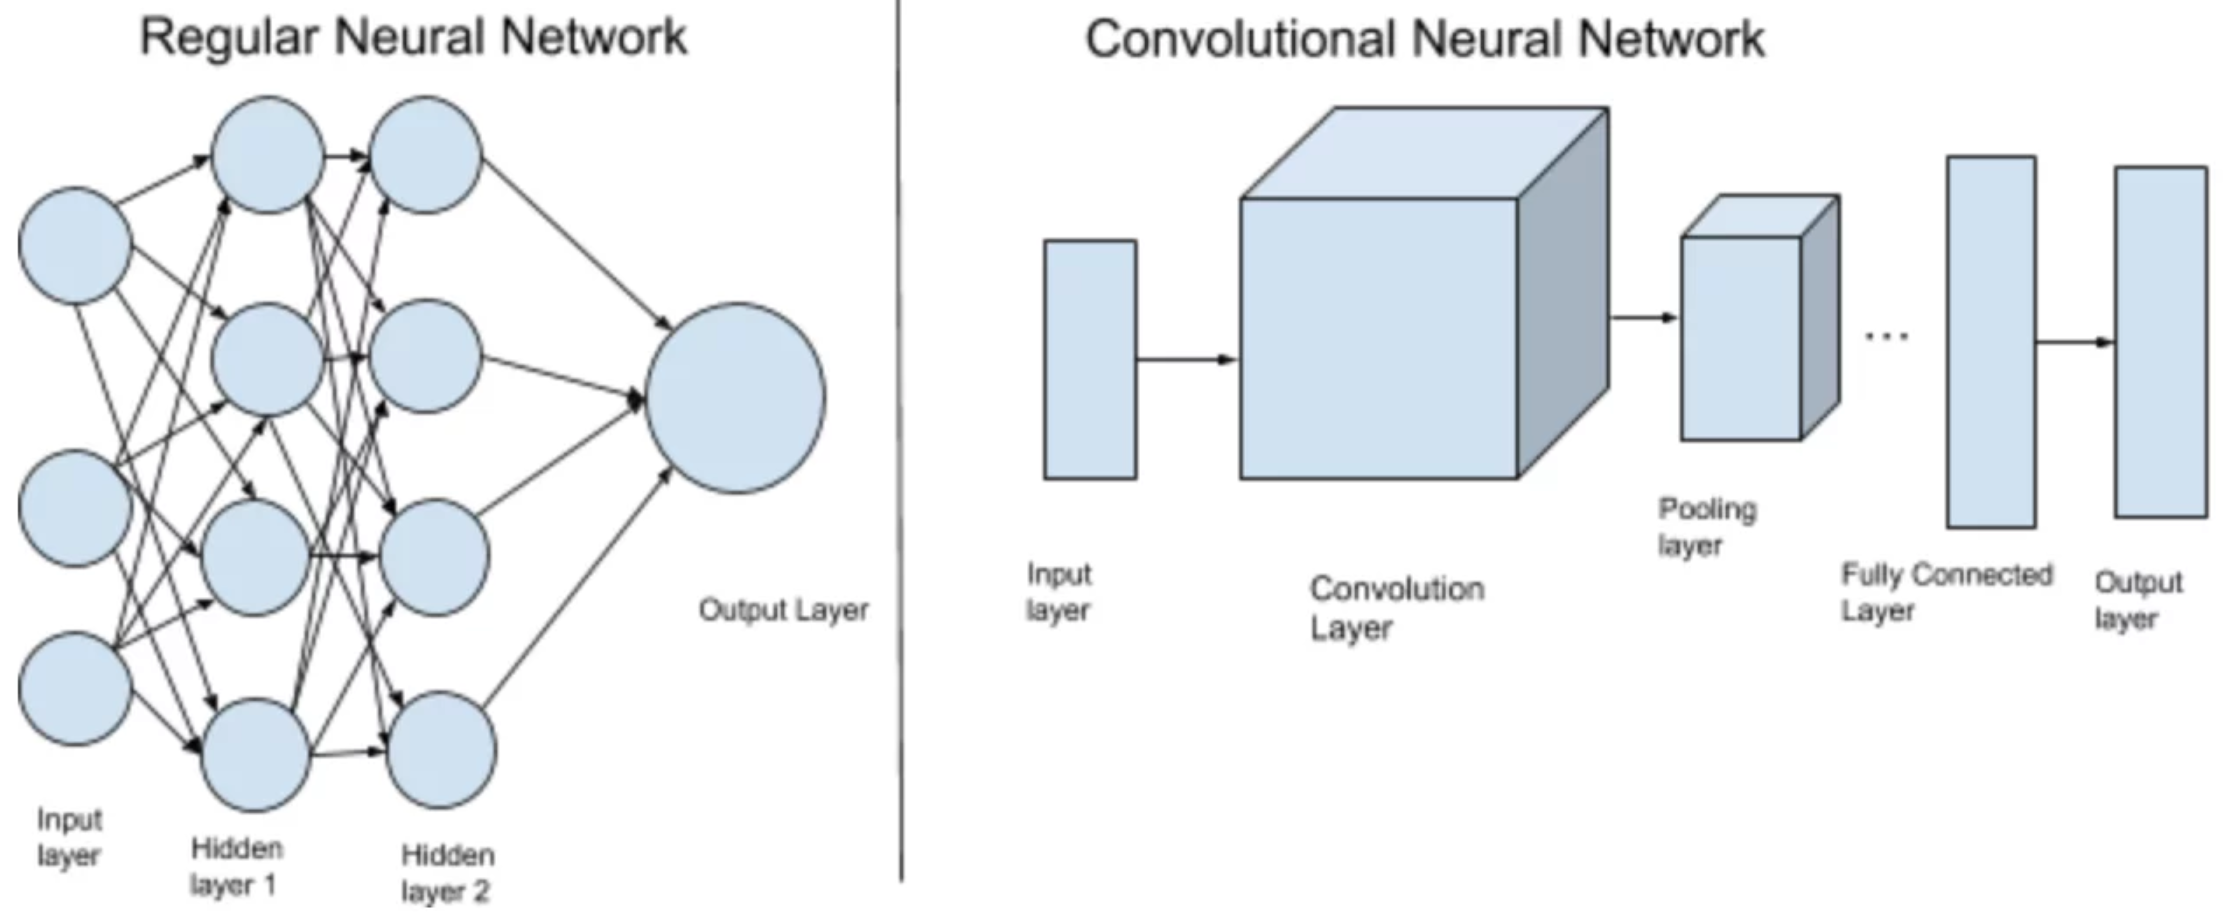

https://www.topcoder.com/blog/convolutional-neural-networks-in-pytorch/


**CNN Architecture**

There are three main types of layers in CNN architecture:

**Convolutional Layer**: The job of the convolutional layer is feature extraction. It learns to find spatial features in an input. This layer is produced by applying a series of different filters to an input. These filters are known as convolutional kernels. A filter is a small grid of values that slides over the input pixel by pixel to produce a filtered output that will be of the same size as the input.

**Pooling Layer**: After the convolutional layer comes the pooling layer; the most common type of pooling layer is maxpooling layer. The main goal of the pooling layer is dimensionality reduction, meaning reducing the size of input by taking the max value from the window. A maxpooling operation breaks an input into smaller patches and it is defined by a patch size and stride.


**Fully Connected Layer** : The last layer in CNN is the fully connected layer. Fully connected means that every output that’s produced at the end of the last pooling layer is an input to each node in this fully connected layer.The role of the fully connected layer is to produce a list of class scores and perform classification based on features that have been extracted by the previous convolutional and pooling layers.  

In [ ]:
df_CNN = df[['label','text']]
df_CNN.head()

,label,text
0,1,One of the other reviewers has mentioned that ...
1,1,A wonderful little production. <br /><br />The...
2,1,I thought this was a wonderful way to spend ti...
3,0,Basically there's a family where a little boy ...
4,1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
 y_CNN=df_CNN['label']

In [ ]:
 from sklearn.model_selection import train_test_split
 df_CNN_train,df_CNN_test,y_CNN_train,y_CNN_test=train_test_split(df_CNN['text'],y_CNN,test_size=0.33,random_state=42)
 print('DF Train Shape: ',df_CNN_train.shape)
 print('DF Test Shape: ',df_CNN_test.shape)
 print('Y Train Shape: ',y_CNN_train.shape)
 print('Y Test Shape: ',y_CNN_test.shape)

DF Train Shape:  (33500,)
DF Test Shape:  (16500,)
Y Train Shape:  (33500,)
Y Test Shape:  (16500,)


In [ ]:
 df_CNN_train

23990    Randolph Scott is heading into Albuquerque to ...
8729     I like this movie cause it has a good approach...
3451     Well don't expect anything deep an meaningful....
2628     This really should deserve a "O" rating, or ev...
38352    Dwight Frye steals the show in this one as a f...
                               ...                        
11284    `Shadow Magic' recaptures the joy and amazemen...
44732    I found this movie to be quite enjoyable and f...
38158    Avoid this one! It is a terrible movie. So wha...
860      This production was quite a surprise for me. I...
15795    This is a decent movie. Although little bit sh...
Name: text, Length: 33500, dtype: object

In [ ]:
 y_CNN_train

23990    1
8729     1
3451     1
2628     0
38352    1
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: label, Length: 33500, dtype: int64

In [ ]:
 df_CNN_test

33553    I really liked this Summerslam due to the look...
9427     Not many television shows appeal to quite as m...
199      The film quickly gets to a major chase scene w...
12447    Jane Austen would definitely approve of this o...
39489    Expectations were somewhat high for me when I ...
                               ...                        
27615    Id just like to say that the film was good and...
21964    Fulci is one of my all time favorite Italian s...
33321    In my case I liked this movie because when I s...
40225    I really liked the movie, thought it was very ...
28203    I saw this movie a few days ago... what the he...
Name: text, Length: 16500, dtype: object

In [ ]:
y_CNN_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
27615    1
21964    1
33321    1
40225    1
28203    0
Name: label, Length: 16500, dtype: int64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_CNN_train)
sequence_train=tokenizer.texts_to_sequences(df_CNN_train)
sequence_test=tokenizer.texts_to_sequences(df_CNN_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 103402 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(33500, 2155)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(16500, 2155)

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
# Conv1D(filters, kernel_size, activation)
x=Conv1D(32,2,activation='relu')(x)
x=MaxPooling1D(2)(x)
x=Conv1D(64,2,activation='relu')(x)
x=MaxPooling1D(2)(x)
x=Conv1D(128,2,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
# each neuron in Denase layer receive inputs from all the previous layer.
#Dense(Units, Activation) Units is  the size of the output from the dense layer.
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2155)]            0         
                                                                 
 embedding (Embedding)       (None, 2155, 20)          2068060   
                                                                 
 conv1d (Conv1D)             (None, 2154, 32)          1312      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1077, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1076, 64)          4160      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 538, 64)          0         
 1D)                                                         

Filters in Conv1D  are the number of times the input is processed or interpreted, whereas the kernel size is the number of input time steps considered as the input sequence is read or processed onto the feature maps.

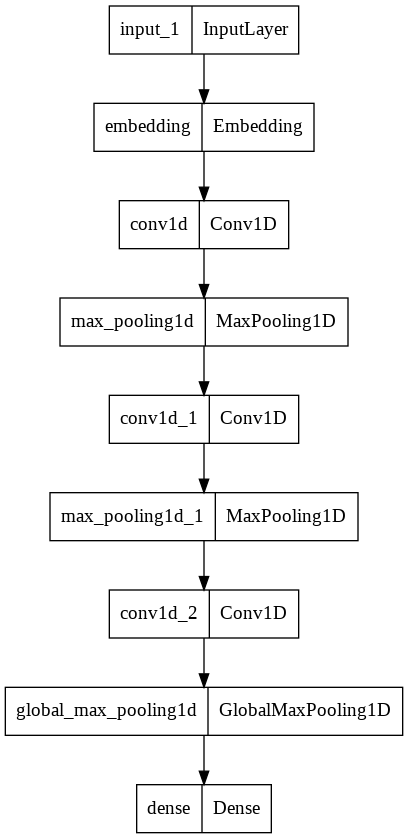

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

CNN_history = model.fit(data_train,y_CNN_train,validation_data=(data_test,y_CNN_test),epochs=10,batch_size=128)

Epoch 1/10
262/262 [==============================] - 18s 28ms/step - loss: 0.6445 - accuracy: 0.6426 - val_loss: 0.3868 - val_accuracy: 0.8315
Epoch 2/10
262/262 [==============================] - 7s 27ms/step - loss: 0.3345 - accuracy: 0.8564 - val_loss: 0.3475 - val_accuracy: 0.8486
Epoch 3/10
262/262 [==============================] - 7s 27ms/step - loss: 0.2351 - accuracy: 0.9071 - val_loss: 0.3086 - val_accuracy: 0.8724
Epoch 4/10
262/262 [==============================] - 7s 27ms/step - loss: 0.1676 - accuracy: 0.9379 - val_loss: 0.3246 - val_accuracy: 0.8745
Epoch 5/10
262/262 [==============================] - 7s 27ms/step - loss: 0.1198 - accuracy: 0.9581 - val_loss: 0.3658 - val_accuracy: 0.8705
Epoch 6/10
262/262 [==============================] - 7s 27ms/step - loss: 0.0821 - accuracy: 0.9729 - val_loss: 0.4234 - val_accuracy: 0.8699
Epoch 7/10
262/262 [==============================] - 7s 27ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.4981 - val_accuracy: 0.865

**Evaluate the model**

Let's see how the model performs. Two values will be returned. Loss (a number which represents the error, lower values are better), and accuracy.

In [ ]:
loss, accuracy = model.evaluate(data_test,y_CNN_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

516/516 [==============================] - 2s 4ms/step - loss: 0.6883 - accuracy: 0.8610
Loss: 0.6882577538490295
Accuracy: 0.8609697222709656


**Plot the accuracy and loss over time**

Based on the History object returned by model.fit() the training and validation loss can be plotted for comparison, as well as the training and validation accuracy.

In this plot, the red lines represent the training loss and accuracy, and the blue lines are the validation loss and accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


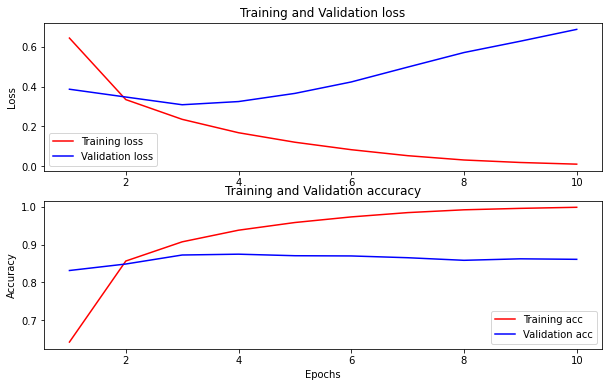

In [ ]:


history_dict = CNN_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_CNN_pred=model.predict(data_test)


In [ ]:
y_CNN_pred.shape


(16500, 5)

In [ ]:
y_CNN_pred

array([[0.9798767 , 0.02012324, 0.        , 0.        , 0.        ],
       [0.02603715, 0.9739629 , 0.        , 0.        , 0.        ],
       [0.9999999 , 0.00000006, 0.        , 0.        , 0.        ],
       ...,
       [0.0042761 , 0.99572384, 0.        , 0.        , 0.        ],
       [0.00000345, 0.99999654, 0.        , 0.        , 0.        ],
       [0.98695326, 0.01304682, 0.        , 0.        , 0.        ]],
      dtype=float32)

In [ ]:
y_CNN_pred=np.argmax(y_CNN_pred,axis=1)


In [ ]:
y_CNN_pred

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
y_CNN_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
27615    1
21964    1
33321    1
40225    1
28203    0
Name: label, Length: 16500, dtype: int64

Text(33.0, 0.5, 'y_pred')

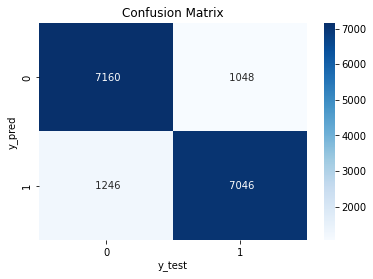

In [ ]:
cm=confusion_matrix(y_CNN_test,y_CNN_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_CNN_test,y_CNN_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8208
           1       0.87      0.85      0.86      8292

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500



**Save and Reload the model**

Now the model will be saved for later use.

In [ ]:
dataset_name = 'CNN_IMDB'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

model.save(saved_model_path, include_optimizer=False)

INFO:tensorflow:Assets written to: ./CNN_IMDB_bert/assets


In [ ]:
CNN_reloaded_model= tf.saved_model.load(saved_model_path)

##**BERT : Bidirectional Encoder Representations from Transformers**

Language models such as word2vec have some limitation  when interpreting context and polysemous words. BERT effectively addresses ambiguity, which is the greatest challenge to natural language understanding according to research scientists in the field. It is capable of parsing language with a relatively human-like "common sense". 

We use the Tensorflow to build the BERT model.So, the first step is passing the trian and test test to tensorflow.

**Build TensorFlow input**


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((df_train.text.values, df_train.label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.text.values, df_test.label.values))

While **tf.data** tries to propagate shape information, the default settings of Dataset.batch result is an unknown batch size because the last batch may not be full. Note the Nones in the shape


Use the drop_remainder argument to ignore that last batch, and get full shape propagation

In [ ]:
train_ds = train_ds.shuffle(len(df_train)).batch(32, drop_remainder=False)
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_ds = test_ds.shuffle(len(df_test)).batch(32, drop_remainder=False)
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**Loading models from TensorFlow Hub**

TF Hub model uses the implementation of BERT from the TensorFlow Models repository on GitHub at tensorflow/models/official/nlp/bert in which "L" is used as a number of hidden layers and "H" as hidden size of H, and "A" as attention heads.


Here you can choose which BERT model you will load from TensorFlow Hub and fine-tune. There are multiple BERT models available.

**BERT-Base, Uncased**: It is a Pretrained model on English language using a masked language modeling (MLM) objective. This model is uncased: it does not make a difference between english and English(https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3)

**Small BERT**: It is an instances of the original BERT architecture with a smaller number L of layers (i.e., residual blocks) combined with a smaller hidden size H and a matching smaller number A of attention heads(https://tfhub.dev/google/collections/bert/1)

**ALBERT:** "A Lite BERT" that reduces model size (but not computation time) by sharing parameters between layers(https://tfhub.dev/google/collections/albert/1)

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = "bert_en_uncased_L-12_H-768_A-12" #@param ["bert_en_uncased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-512_A-8", "albert_en_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


**Preprocessing the model**

Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. **TensorFlow Hub** provides a matching preprocessing model for each of the BERT models discussed above, which implements this transformation using TF ops from the TF.text library. It is not necessary to run pure Python code outside your TensorFlow model to preprocess text.

So, the preprocessing model will be loaded into a **hub.KerasLayer** to compose the fine-tuned model. 

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

**EX)** Let's try the preprocessing model on some text and see the output:

In [ ]:
text_test = ['Some films just simply should not be remade']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  2070  3152  2074  3432  2323  2025  2022 26943   102     0     0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


As you can see, now you have the 3 outputs from the preprocessing that a BERT model would use

**(input_words_id, input_mask and input_type_ids)**

The input is truncated to 128 tokens. BERT has a constraint on the maximum length of a sequence after tokenizing. For any BERT model, the maximum sequence length after tokenization is 512.

**The input_type_ids** only have one value (0) because this is a single sentence input. For a multiple sentence input, it would have one number for each input.

**The input masks** is the mask of the words in a sentence – all masks starts with CLF token and SEP token.So the masked array is of size sentence size + 2. The token is defined for CLF – 101 and SEP – 102 and .Also the input mask is 1 for useful tokens,and 0 for padding. 

**The input_words_ids** has the token ids of the input sequences and gives unique id’s for individual words. Each word is encoded(ids can be from a vocabulary), padded and separated Length.

To generate embedding now all we need to do is to pass this text_preprocessed to the encoder. 

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

In [ ]:

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.9050149  -0.53438425 -0.9159468   0.8388635   0.68536437 -0.2929973
  0.8753313   0.31891656 -0.78357065 -0.9999845  -0.6018701   0.94420934]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.5450577   0.22905885 -0.39379197 ... -0.17669165  0.41985902
   0.5118322 ]
 [-0.09799965  0.41109642 -0.38803655 ...  0.11816595  0.35307637
   0.5856708 ]
 [ 0.76654     0.505477   -0.5569687  ... -0.28927135 -0.09421961
   0.03069419]
 ...
 [ 1.0450841   0.29049736 -0.15482247 ...  0.23571135 -0.60864913
  -0.15959002]
 [-0.10242891 -0.45364594 -0.02705495 ...  0.39753422  0.32202193
   0.15369482]
 [-0.17653458 -0.5197467  -0.04476972 ...  0.42958444  0.3210766
   0.16374257]]


The BERT models return a map with 3 important keys: **pooled_output, sequence_output, encoder_outputs:**

**pooled_output** represents each input sequence as a whole. The shape is **[batch_size, H]**. You can think of this as an embedding for the entire movie review.

**sequence_output** represents each input token in the context. The shape is **[batch_size, seq_length, H**]. You can think of this as a contextual embedding for every token in the movie review.


**Build the Model**

The fine-tuned model will be created with the preprocessing model, and the selected BERT model, one Dense and a Dropout layer.

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
   # The dropout rate is set to 10%, meaning one in 10 inputs will be randomly excluded from each update cycle.
  net = tf.keras.layers.Dropout(0.1)(net)
  #Dense(Units, Activation) Units is  the size of the output from the dense layer.
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

**encoder_outputs** are the intermediate activations of the L( is used as a number of hidden layers) Transformer blocks. outputs["encoder_outputs"][i] is a Tensor of shape [batch_size, seq_length, 1024] with the outputs of the i-th Transformer block, for 0 <= i < L. The last value of the list is equal to sequence_output.

Let's check that the model runs with the output of the preprocessing model.

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.44815856]], shape=(1, 1), dtype=float32)


In [ ]:
#bert_raw_result

**tf.sigmoid** Computes sigmoid of x element-wiseand it measures the probability error in discrete classification tasks in which each class is independent and not mutually exclusive.If a positive number is large, then its sigmoid will approach to 1 since the formula If a negative number is large, its sigmoid will approach to 0. [Reference](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) 

Sigmoid is equivalent to a 2-element Softmax, where the second element is assumed to be zero. The sigmoid function always returns a value between 0 and 1.

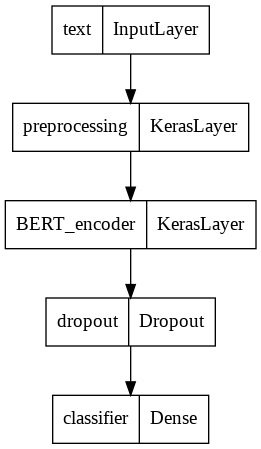

In [ ]:
tf.keras.utils.plot_model(classifier_model)

 we use 33 percent of the training set as the test set and we validate our model on the test set. We use Adam optimizer (with β1 = 0.9 and β2 = 0.999) to minimize the cross-entropy loss. The
slanted triangular learning rate is used in our experiment, the base learning rate is 3e-5, and the warm-up proportion is 0.1.
In the experiment we find that a lower learning rate helps to effectively use pre-trained BERT weights. The dropout
probability is always kept at 0.1. The batch size is set to 16 or 32, it depends on the maximum sequence length in a
particular task. The larger batch size is what we want to use, but it is limited to resources.

In [ ]:
from official.nlp import optimization

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

**Loading the BERT model and training**

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
BERT_history = classifier_model.fit(x=train_ds,
                               validation_data=(X_test, y_test),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/10
1047/1047 [==============================] - 1219s 1s/step - loss: 0.3951 - binary_accuracy: 0.7973 - val_loss: 0.3499 - val_binary_accuracy: 0.8661
Epoch 2/10
1047/1047 [==============================] - 1204s 1s/step - loss: 0.2398 - binary_accuracy: 0.9003 - val_loss: 0.2796 - val_binary_accuracy: 0.8989
Epoch 3/10
1047/1047 [==============================] - 1204s 1s/step - loss: 0.1312 - binary_accuracy: 0.9522 - val_loss: 0.3532 - val_binary_accuracy: 0.8925
Epoch 4/10
1047/1047 [==============================] - 1204s 1s/step - loss: 0.0698 - binary_accuracy: 0.9787 - val_loss: 0.4352 - val_binary_accuracy: 0.8968
Epoch 5/10
1047/1047 [==============================] - 1203s 1s/step - loss: 0.0399 - binary_accuracy: 0.9890 - val_loss: 0.5968 - val_binary_accuracy: 0.8906
Epoch 6/10
1047/1047 [==============================] - 1204s 1s/step - loss: 0.0211 - binary_accuracy: 0.9947 - val_

The time of execution is 11263.643s which is 3 hour and 0.129 min

**Evaluate the model**

The BERT loss function takes into consideration only the prediction of the masked values and ignores the prediction of the non-masked words. As a consequence, the model converges slower than directional models, a characteristic which is offset by its increased context awareness.

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

516/516 [==============================] - 182s 351ms/step - loss: 0.9129 - binary_accuracy: 0.8981
Loss: 0.9128670692443848
Accuracy: 0.8980606198310852


**Comparison of the BERT models performance using Accuracy**

**bert_en_uncased_L-12_H-768_A-12**:
```bash
516/516 [==============================] - 182s 351ms/step - loss: 0.9129 - binary_accuracy: 0.8981
Loss: 0.9128670692443848
Accuracy: 0.8980606198310852
```

**small_bert/bert_en_uncased_L-4_H-512_A-8:**

```bash
516/516 [==============================] - 53s 103ms/step - loss: 0.8582 - binary_accuracy: 0.8698
Loss: 0.8582355380058289
Accuracy: 0.8698182106018066
```
      
**albert_en_base:**

```bash
516/516 [==============================] - 164s 317ms/step - loss: 0.7218 - binary_accuracy: 0.5132
Loss: 0.7217753529548645
Accuracy: 0.5132121443748474
```       

It seems that BERT_uncased has higher accuracy than others.

**Plot the accuracy and loss of the bert_an_uncasded model over time**


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


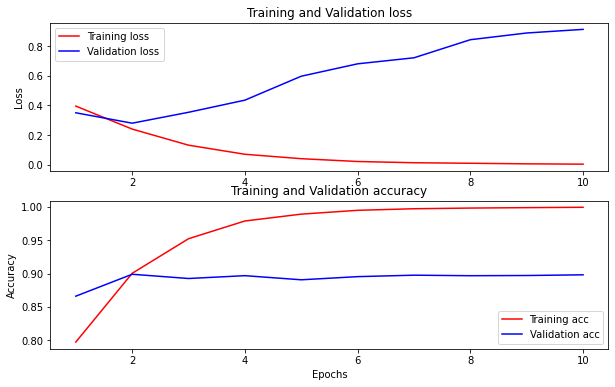

In [ ]:
history_dict = BERT_history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_predict_BERT =  classifier_model.predict(test_ds)


In [ ]:
y_predict_BERT.shape

(16500, 1)

In [ ]:
y_predict_BERT

array([[-11.99812  ],
       [ 12.920344 ],
       [-12.985461 ],
       ...,
       [  7.4631076],
       [ 12.530898 ],
       [  4.259557 ]], dtype=float32)

In [ ]:
y_predict_BERT_Sigmoeid = tf.sigmoid(tf.constant(y_predict_BERT))

In [ ]:
y_predict_BERT_Sigmoeid

<tf.Tensor: shape=(16500, 1), dtype=float32, numpy=
array([[0.00000616],
       [0.9999975 ],
       [0.00000229],
       ...,
       [0.9994265 ],
       [0.9999964 ],
       [0.98606825]], dtype=float32)>

**Export for inference**

Now the fine-tuned model will be saved for later use.

In [ ]:
dataset_name = 'BERT_IMDB'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

INFO:tensorflow:Assets written to: ./BERT_IMDB_bert/assets


INFO:tensorflow:Assets written to: ./BERT_IMDB_bert/assets


Let's reload the model, so you can try it side by side with the model that is still in memory.

In [ ]:
BERT_reloaded_model = tf.saved_model.load(saved_model_path)

In [ ]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such an amazing movie!',  # this is the same sentence tried earlier
    'The movie was great!',
    'The movie was meh.',
    'The movie was okish.',
    'The movie was terrible...'
]

reloaded_results = tf.sigmoid(BERT_reloaded_model(tf.constant(examples)))


print('Results from the saved model:')
print_my_examples(examples, reloaded_results)


Results from the saved model:
input: this is such an amazing movie! : score: 0.996642
input: The movie was great!           : score: 0.942301
input: The movie was meh.             : score: 0.001411
input: The movie was okish.           : score: 0.012526
input: The movie was terrible...      : score: 0.000074



**Comparison of the prediction's capability among BERT modles**

We can try any arbitary sentence to see the score of each models prediction.For example for the above sentences the results would be:

**Results from the bert en_uncased model:**
```bash
Results from the saved model:
input: this is such an amazing movie! : score: 0.996642
input: The movie was great!           : score: 0.942301
input: The movie was meh.             : score: 0.001411
input: The movie was okish.           : score: 0.012526
input: The movie was terrible...      : score: 0.000074
```

**Results from the small_bert/bert_en_uncased model**


```bash
Results from the saved model:
input: this is such an amazing movie! : score: 0.999300
input: The movie was great!           : score: 0.990146
input: The movie was meh.             : score: 0.189059
input: The movie was okish.           : score: 0.000025
input: The movie was terrible...      : score: 0.000027
```

**Results from the albert_en_base model**
```bash
Results from the saved model:
input: this is such an amazing movie! : score: 0.684056
input: The movie was great!           : score: 0.682430
input: The movie was meh.             : score: 0.672123
input: The movie was okish.           : score: 0.663330
input: The movie was terrible...      : score: 0.689129
```

As you can see among differents type of models BERT_uncased  acheived the better result interms performance metrics such as of Accuracy ,Loss and the prediction's capability. So, we will feed the proposed model with the BERT-base model with a hidden size of 768, 12 self-attention heads and 12 Transformer.


## **BERT + CNN**

In the last part, we will inspect finetuning models by adding simple fully connected Convolutional Neural Network (CNN) layers. BERT takes the final hidden state of the first token [CLS] as the representation of the whole sequence. The most significant difference between our proposed method and the BERT-Base models is that we use the hidden state of all the final outputs of the BERT as the contextualized word vector. Then we use CNN to extract the high-level features, finally, the max-pooling layer retains the most important features for text classification.

The BERT-CNN primarily consists of three main components:

 1) Preprocessing the data. 
 
 2) BERT base model, in which the text was passed through 12 layers of self-attention to obtain the contextual vector representation. 
 
 3) CNN, which is used as a classifier. 


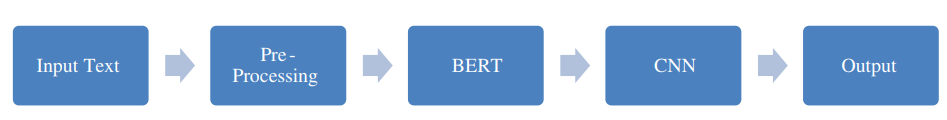


**Builsing the Model**

In [ ]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]
      
    # Conv1D(filters, kernel_size, activation)# Filters is a windows size
    net = tf.keras.layers.Conv1D(32, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    
    net = tf.keras.layers.Conv1D(64, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
    # net = tf.keras.layers.Flatten()(net)
    # each neuron in Denase layer receive inputs from all the previous layer.
    # Dense(Units, Activation) Units is  the size of the output from the dense layer.
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    
    # The dropout rate is set to 10%, meaning one in 10 inputs will be randomly excluded from each update cycle.
    net = tf.keras.layers.Dropout(0.1)(net)
    # net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier')(net)
    
    return tf.keras.Model(text_input, net)

For this implementation, I am using the sequence_output as input to the convolutional layer. It represents each input token in the context.

 **The shape is [batch_size, seq_length, H].** You can think of this as a contextual embedding for every token in the text. This outputs saves positional information about the inputs, then it would male cense to feed a convolutional layer.

**ReLU** stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x). It is linear (identity) for all positive values, and zero for all negative values.

Also, **tf.keras.layers.Conv1D** creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. [Reference](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) 

**Tf.keras.layers.GlobalMaxPool1D()** downsamples the input representation by taking the maximum value over the time dimension.[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D)


**Dropout** layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.[Reference ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)


**The dense** layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models..[Reference ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [ ]:
Bert_cnn_classifier_model = build_CNN_classifier_model()
bert_raw_result = Bert_cnn_classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.5713544  0.61664915 0.55904114]], shape=(1, 3), dtype=float32)


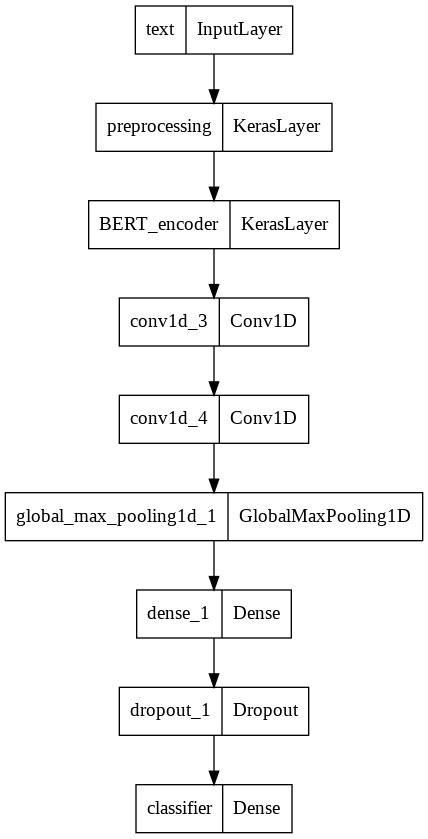

In [ ]:
tf.keras.utils.plot_model(Bert_cnn_classifier_model)

In [ ]:
Bert_cnn_classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#metrics = tf.metrics.CategoricalCrossentropy()
metrics = tf.metrics.Accuracy()

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

Bert_cnn_classifier_model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

**Defining the weights for the model.**

In [ ]:
#This is an balanced dataset.
positive, negative = np.bincount(df['label'])
total = positive + negative 
print('Examples:\n    Total: {}\n    positive: {} ({:.2f}% of total)\n'.format(
    total, positive, 100 * positive / total))
print('Examples:\n    Total: {}\n    negative: {} ({:.2f}% of total)\n'.format(
    total, negative, 100 * negative / total))


Examples:
    Total: 50000
    positive: 25000 (50.00% of total)

Examples:
    Total: 50000
    negative: 25000 (50.00% of total)



In [ ]:
weight_for_0 = (1 /positive)*(total)/2.0 
weight_for_1 = (1 / negative)*(total)/2.0



class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:

print(f'Training model with {tfhub_handle_encoder}')
BERTCNN_history =Bert_cnn_classifier_model.fit(x=train_ds,
                                       validation_data=(X_test, y_test),
                                       epochs=epochs,
                                       class_weight=class_weight
                                       
                                      )

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/10
1047/1047 [==============================] - 1231s 1s/step - loss: 0.4696 - accuracy: 0.7764 - val_loss: 0.3255 - val_accuracy: 0.8695
Epoch 2/10
1047/1047 [==============================] - 1215s 1s/step - loss: 0.2756 - accuracy: 0.8875 - val_loss: 0.2982 - val_accuracy: 0.8736
Epoch 3/10
1047/1047 [==============================] - 1213s 1s/step - loss: 0.1747 - accuracy: 0.9356 - val_loss: 0.2968 - val_accuracy: 0.8912
Epoch 4/10
1047/1047 [==============================] - 1214s 1s/step - loss: 0.0926 - accuracy: 0.9714 - val_loss: 0.3744 - val_accuracy: 0.8962
Epoch 5/10
1047/1047 [==============================] - 1213s 1s/step - loss: 0.0495 - accuracy: 0.9873 - val_loss: 0.5129 - val_accuracy: 0.8919
Epoch 6/10
1047/1047 [==============================] - 1213s 1s/step - loss: 0.0297 - accuracy: 0.9929 - val_loss: 0.5823 - val_accuracy: 0.8816
Epoch 7/10
1047/1047 [===================

**Evaluate the model**

The excution time is 11372.766 s which is 3 hour and 15 minutes 

In [ ]:
loss, accuracy = Bert_cnn_classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

516/516 [==============================] - 182s 351ms/step - loss: 0.8661 - accuracy: 0.9007
Loss: 0.8660560250282288
Accuracy: 0.9006666541099548


**Plot the accuracy and loss of the bert+cnn_an_uncasded model over time**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


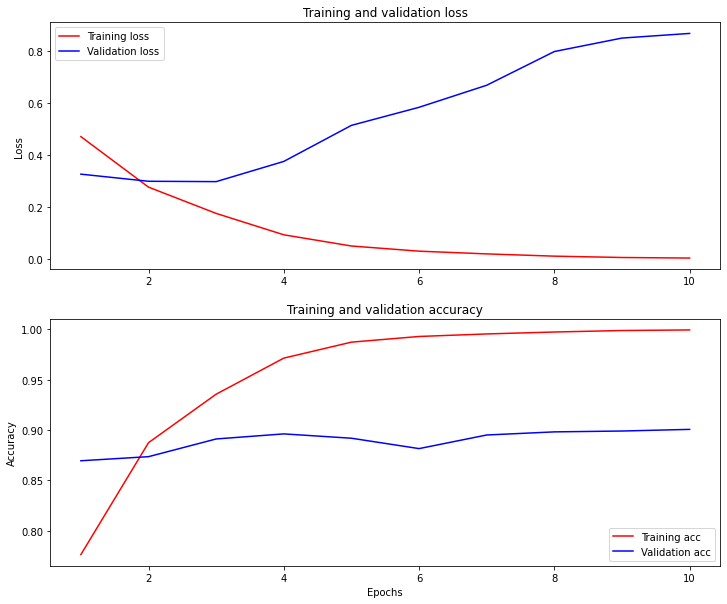

In [ ]:
history_dict = BERTCNN_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_BERTCNN_pred=Bert_cnn_classifier_model.predict(test_ds)
y_BERTCNN_pred

array([[0.00001657, 0.99998343, 0.        ],
       [0.9999875 , 0.00001246, 0.00000005],
       [0.00000998, 0.99999   , 0.        ],
       ...,
       [0.00001212, 0.99998784, 0.        ],
       [0.00019358, 0.99980646, 0.00000005],
       [0.9999862 , 0.00001382, 0.00000004]], dtype=float32)

In [ ]:
y_BERTCNN_pred.shape

(16500, 3)

**Export for inference**

Now we just save the fine-tuned model for later use


In [ ]:
dataset_name = 'BERTCNN_IMDB'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

Bert_cnn_classifier_model.save(saved_model_path, include_optimizer=False)

INFO:tensorflow:Assets written to: ./BERTCNN_IMDB_bert/assets


INFO:tensorflow:Assets written to: ./BERTCNN_IMDB_bert/assets


In [ ]:
BERT_CNN_reloaded_model = tf.saved_model.load(saved_model_path)

##**Models performance comparison** 

The evaluation result for CNN, BERT, CNN+BERT models are reported as follows:

**CNN** 
```bash
516/516 [==============================] - 2s 4ms/step - loss: 0.6883 - accuracy: 0.8610
Loss: 0.6882577538490295
Accuracy: 0.8609697222709656
```
**BERT**
```bash
516/516 [==============================] - 182s 351ms/step - loss: 0.9129 - binary_accuracy: 0.8981
Loss: 0.9128670692443848
Accuracy: 0.8980606198310852
```

**BERT+CNN**
```bash
516/516 [==============================] - 182s 351ms/step - loss: 0.8661 - accuracy: 0.9007
Loss: 0.8660560250282288
Accuracy: 0.9006666541099548
```


##**Conclusion** 

In this part, we reported experiments with the proposed model in comparison with baseline models. The performance of our model was shown the above section. From the results, we can observe that:
* Some traditional methos discussed in this project achieved a high score accuracy but due to their limitations they cannot be used alone and on the large dataset such as yelp dataset.
* The CNN and BERT models were used as baseline model, while the BERT performs better than CNN and BERT+CNN works better than BERT and CNN.
* Our method achieved significant and consistent improvement as compared to other baselines. The reason is that our models can make full use of the information of contextualized word representations. In our model, after obtaining the rich contextual word representation, the convolutional network automatically extracts higher-level features, and then the most significant semantic features are selected by the max-pooling layer for classification. It verifies that incorporating the rich information of contextualized word representations could help us better correctly classify text.
